# Import Libraries

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("display.max_columns",100)

# Data Loading

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
test_data  = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")

In [11]:
train_data.sample(3)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
105063,105063,40,160,75,83.0,1.2,1.2,1,1,150,100,128,199,155,48,120,18.2,1,0.8,21,17,24,0,1
7123,7123,35,170,90,99.0,1.2,1.2,1,1,129,75,112,157,136,35,90,14.3,1,0.8,14,21,15,0,0
108859,108859,55,165,65,87.0,1.0,1.5,1,1,130,84,116,187,170,45,108,15.7,1,0.7,23,18,38,0,0


In [12]:
test_data.sample(3)

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
4602,163858,25,165,65,80.0,1.0,1.0,1,1,116,78,105,191,119,50,116,15.9,1,0.8,45,40,20,0
94595,253851,40,170,75,89.1,0.8,1.0,1,1,139,87,90,221,114,55,143,15.7,1,1.0,24,24,51,0
93122,252378,45,150,70,93.0,0.7,0.8,1,1,109,66,97,153,104,56,93,12.7,1,0.7,14,12,16,0


In [5]:
train_data.shape,test_data.shape

((159256, 24), (106171, 23))

In [13]:
train_data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [14]:
test_data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

# Correlation Table  

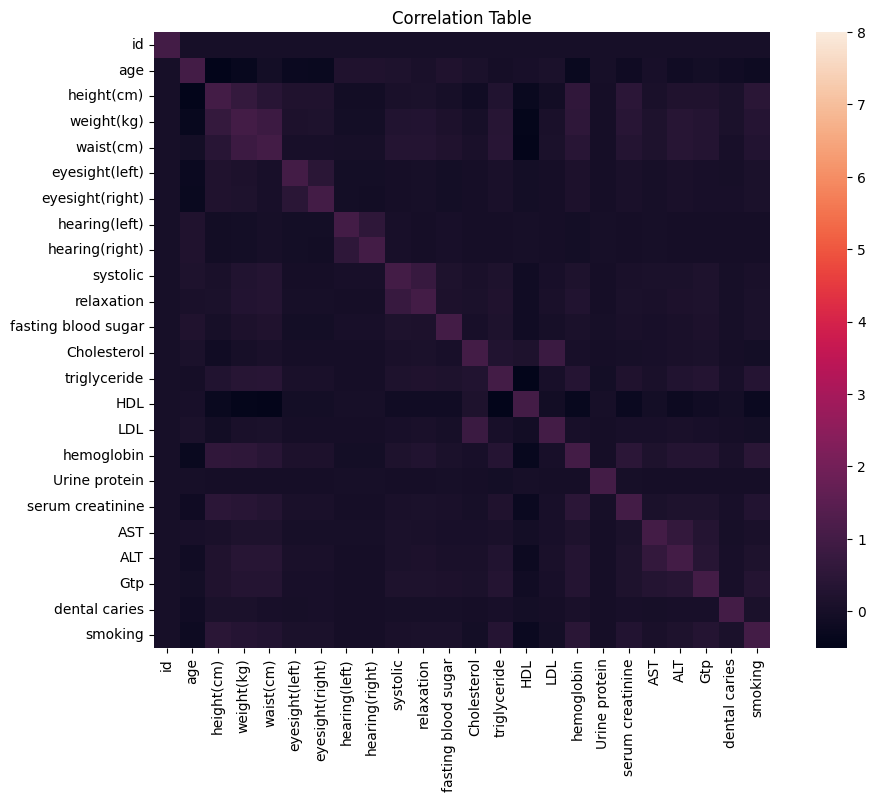

In [24]:
corr_matrix = train_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, vmax=8,square=True)
plt.title("Correlation Table")
plt.show()

In [43]:
x = train_data.drop(["smoking"],axis=1)
y = train_data["smoking"]

In [44]:
g = GradientBoostingRegressor()

In [45]:
model1=g.fit(x,y)

In [46]:
tahmin1=model1.predict(test_data)

In [62]:
sonuc=pd.DataFrame(tahmin1,columns=['smoking'])

In [63]:
sonuc["id"]=test_data["id"]

In [65]:
sonuc

,smoking,id
0,0.525290,159256
1,0.205573,159257
2,0.529320,159258
3,0.103661,159259
4,0.544134,159260
...,...,...
106166,0.505556,265422
106167,0.657127,265423
106168,0.420965,265424
106169,0.075676,265425


In [66]:
sonuc=sonuc[['id','smoking']]

In [67]:
sonuc.to_csv('sonuc',index=False)